In [49]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.mlab as mlab
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os
import io
import requests
import pickle
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Random Forest Income prediction

In [50]:
data = pd.read_csv("income.csv")
df = pd.DataFrame(data)
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82.0,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66.0,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54.0,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41.0,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [51]:
df.dropna(inplace=True)

In [52]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82.0,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66.0,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54.0,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [53]:
# code will replace the special character to nan and then drop the columns 
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['marital.status'] = df['marital.status'].replace('?',np.nan)
df['hours.per.week'] = df['hours.per.week'].replace('?',np.nan)
df['income'] = df['income'].replace('?',np.nan)


In [54]:
df['native.country'] = ['Others' if x != ('Mexico') and x != ('United-States') and x != ('Canada') and x != ('India') and x != ('Philippines')
                                 and x != ('Germany') and x != ('Puerto-Rico') and x != ('El-Salvador') else x for x in df['native.country']]

In [55]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [56]:
def customize_edu_level(x):
    if 'Bachelors' in x:
        return 'Bachelor’s degree'
    if 'Masters' in x:
        return 'Master’s degree'
    if 'Prof-school' in x or 'Doctorate' in x:
        return 'Ph.d or Doctorate degree'
    return 'Less than a Bachelors'

df['education'] = df['education'].apply(customize_edu_level)

In [57]:
df.dropna(inplace=True)
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [58]:
def customize_workclass(x):
    if 'Private' in x:
        return 'Private'
    if 'State-gov' in x:
        return 'State Government'
    if 'Federal-gov' in x:
        return 'Federal Government'
    if 'Local-gov' in x:
        return 'Local Government'
    if 'Self-emp-not-inc' or 'Self-emp-inc' in x:
        return 'Self employed'

df['workclass'] = df['workclass'].apply(customize_workclass)

In [59]:
df.dropna(inplace=True)
df['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [60]:
def customize_occupation(x):
    if 'Exec-managerial' in x:
        return 'Executive Manager'
    if 'Prof-specialty' in x:
        return 'Professional specialist '
    if 'Craft-repair' in x:
        return 'Craft Occupation'
    if 'Adm-clerical' in x:
        return 'Admin clerical'
    if 'Sales' in x:
        return 'Sales'
    return 'Other Service'

df['occupation'] = df['occupation'].apply(customize_occupation)

In [61]:
df['hours.per.week'].unique()

array([18, 40, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 70, 52, 72,
       39,  6, 65, 80, 67, 99, 30, 75, 12, 26, 10, 84, 38, 62, 44,  8, 28,
       59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 15, 63,  1, 36, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 14, 77, 31, 78, 11, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [62]:
def customize_hours_work(x):
    if x <= 20:
        return 'Below 20'
    if x <= 40 and x > 20:
        return '20 - 40'
    if x <= 60 and x > 40:
        return '40 - 60'
    if x <= 80 and x > 60:
        return '60 - 80'
    if x > 80:
        return 'Above 80'
    
df['hours.per.week'] = df['hours.per.week'].apply(customize_hours_work)

In [63]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [64]:
df['age'].unique()

array([82., 54., 41., 34., 38., 74., 68., 45., 52., 32., 46., 57., 22.,
       37., 29., 61., 51., 21., 33., 49., 23., 59., 60., 63., 53., 44.,
       43., 48., 71., 73., 40., 50., 42., 39., 55., 47., 31., 58., 62.,
       36., 67., 72., 78., 83., 26., 70., 27., 35., 81., 66., 65., 25.,
       28., 56., 20., 30., 90., 24., 64., 75., 19., 77., 80., 18., 17.,
       69., 79., 76., 88., 84., 85., 86.])

In [65]:
def customize_age(x):
    if x < 20:
        return 'Below 20'
    if x <= 30 and x >= 20:
        return '20 - 30'
    if x <= 40 and x > 30:
        return '31 - 40'
    if x <= 50 and x > 40:
        return '41 - 50'
    if x <= 60 and x > 50:
        return '51- 60'
    if x > 60:
        return 'Above 60'
    
df['age'] = df['age'].apply(customize_age)

In [66]:
df_new = df.copy()

In [67]:
df_new.dropna(how='any',inplace=True)

In [68]:
#dropping based on uniquness of data from the dataset 
df_new.drop(['fnlwgt', 'capital.gain','capital.loss', 'education.num', 'sex', 'race', 'relationship'], axis=1, inplace=True)

In [69]:
df_new

,age,workclass,education,marital.status,occupation,hours.per.week,native.country,income
1,Above 60,Private,Less than a Bachelors,Widowed,Executive Manager,Below 20,United-States,0
3,51- 60,Private,Less than a Bachelors,Divorced,Other Service,20 - 40,United-States,0
4,41 - 50,Private,Less than a Bachelors,Separated,Professional specialist,20 - 40,United-States,0
5,31 - 40,Private,Less than a Bachelors,Divorced,Other Service,40 - 60,United-States,0
6,31 - 40,Private,Less than a Bachelors,Separated,Admin clerical,20 - 40,United-States,0
...,...,...,...,...,...,...,...,...
32555,51- 60,Private,Master’s degree,Married-civ-spouse,Executive Manager,20 - 40,United-States,1
32556,20 - 30,Private,Less than a Bachelors,Never-married,Other Service,20 - 40,United-States,0
32557,20 - 30,Private,Less than a Bachelors,Married-civ-spouse,Other Service,20 - 40,United-States,0
32558,31 - 40,Private,Less than a Bachelors,Married-civ-spouse,Other Service,20 - 40,United-States,1


In [70]:
from sklearn.preprocessing import LabelEncoder
label_encode_edu = LabelEncoder()
df_new['education'] = label_encode_edu.fit_transform(df_new['education'])
df_new["education"].unique()

array([1, 3, 0, 2])

In [71]:
label_encode_country = LabelEncoder()
df_new['native.country'] = label_encode_country.fit_transform(df_new['native.country'])
df_new["native.country"].unique()

array([8, 5, 4, 3, 6, 0, 7, 2, 1])

In [72]:
label_encode_age = LabelEncoder()
df_new['age'] = label_encode_age.fit_transform(df_new['age'])
df_new["age"].unique()

array([4, 3, 2, 1, 0, 5])

In [73]:
label_encode_marital_status = LabelEncoder()
df_new['marital.status'] = label_encode_marital_status.fit_transform(df_new['marital.status'])
df_new["marital.status"].unique()

array([6, 0, 5, 4, 2, 3, 1])

In [74]:
label_encode_work_hours = LabelEncoder()
df_new['hours.per.week'] = label_encode_work_hours.fit_transform(df_new['hours.per.week'])
df_new["hours.per.week"].unique()

array([4, 0, 1, 2, 3])

In [75]:
label_encode_workclass = LabelEncoder()
df_new['workclass'] = label_encode_workclass.fit_transform(df_new['workclass'])
df_new["workclass"].unique()

array([2, 4, 0, 3, 1])

In [76]:
label_encode_occupation = LabelEncoder()
df_new['occupation'] = label_encode_occupation.fit_transform(df_new['occupation'])
df_new["occupation"].unique()

array([2, 3, 4, 0, 1, 5])

In [77]:
df_new.head()

,age,workclass,education,marital.status,occupation,hours.per.week,native.country,income
1,4,2,1,6,2,4,8,0
3,3,2,1,0,3,0,8,0
4,2,2,1,5,4,0,8,0
5,1,2,1,0,3,1,8,0
6,1,2,1,5,0,0,8,0


In [78]:
X = df_new.drop('income',axis=1)
y = df_new.income

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [80]:
rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)
predictions_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [81]:
accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)

In [82]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,predictions_rf),3)*100} %")

The accuracy of the model is 82.5 %


In [83]:
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_rf,3)*100} %")

The AUC Score  is 87.3 %


In [84]:
#AUC Random Forest
train_probs = rf.predict_proba(X_train)[:,1] 
probs = rf.predict_proba(X_test)[:, 1]
train_predictions = rf.predict(X_train)

In [85]:
def evaluate_model(y_pred, probs,train_predictions, train_probs):
   
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()

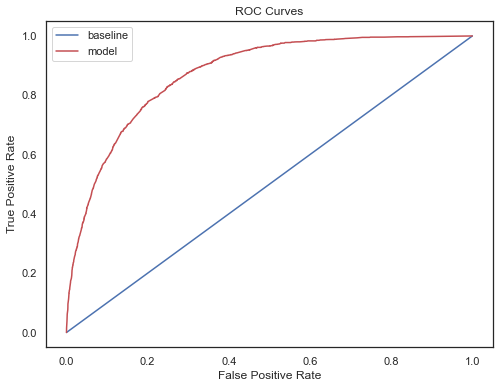

In [86]:
evaluate_model(predictions_rf,probs,train_predictions,train_probs)

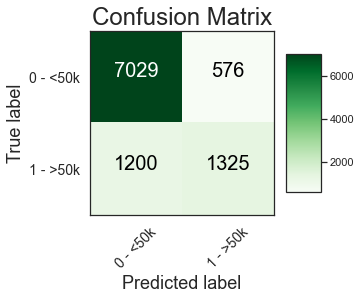

In [87]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, predictions_rf)
plot_confusion_matrix(cm, classes = ['0 - <50k', '1 - >50k'],
                      title = 'Confusion Matrix')

In [88]:
#Feature importance of our model
feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: marital.status                      Importance: 0.39707865040177237
Feature: education                           Importance: 0.22096062030259508
Feature: occupation                          Importance: 0.1173502053327022
Feature: age                                 Importance: 0.11615935332867988
Feature: hours.per.week                      Importance: 0.06939231755957313
Feature: workclass                           Importance: 0.05019991534957181
Feature: native.country                      Importance: 0.02885893772510532


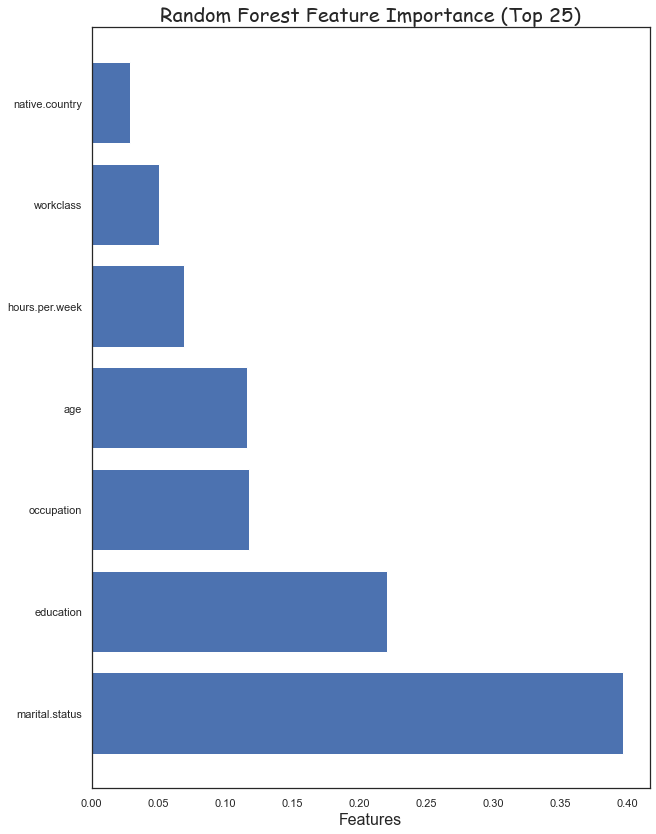

In [89]:
feature_names_8 = [i[0] for i in feature_importances_ranked[:8]]
y_ticks = np.arange(0, len(feature_names_8))
x_axis = [i[1] for i in feature_importances_ranked[:8]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_8, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [90]:
X

,age,workclass,education,marital.status,occupation,hours.per.week,native.country
1,4,2,1,6,2,4,8
3,3,2,1,0,3,0,8
4,2,2,1,5,4,0,8
5,1,2,1,0,3,1,8
6,1,2,1,5,0,0,8
...,...,...,...,...,...,...,...
32555,3,2,2,2,2,0,8
32556,0,2,1,4,3,0,8
32557,0,2,1,2,3,0,8
32558,1,2,1,2,3,0,8


In [91]:
# country, edlevel, yearscode, hours per week, marital status, work class, occupation
X = np.array([["United-States", 'Master’s degree', 'Below 20', 'Below 20', 'Married-civ-spouse', 'State Government', 'Sales' ]])
X

array([['United-States', 'Master’s degree', 'Below 20', 'Below 20',
        'Married-civ-spouse', 'State Government', 'Sales']], dtype='<U18')

In [92]:
X[:, 0] = label_encode_country.transform(X[:,0])
X[:, 1] = label_encode_edu.transform(X[:,1])
X[:, 2] = label_encode_age.transform(X[:,2])
X[:, 3] = label_encode_work_hours.transform(X[:,3])
X[:, 4] = label_encode_marital_status.transform(X[:,4])
X[:, 5] = label_encode_workclass.transform(X[:,5])
X[:, 6] = label_encode_occupation.transform(X[:,6])
X = X.astype(float)
X

array([[8., 2., 5., 4., 2., 4., 5.]])

In [93]:
y_pred = rf.predict(X)
y_pred

array([0], dtype=int64)

In [94]:
import pickle

In [95]:
data = {"model": rf, "label_encode_country": label_encode_country, "label_encode_edu": label_encode_edu, "label_encode_age":label_encode_age, "label_encode_work_hours":label_encode_work_hours, "label_encode_marital_status":label_encode_marital_status, "label_encode_workclass":label_encode_workclass, "label_encode_occupation":label_encode_occupation}
with open('random_forest_income_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

In [96]:
with open('random_forest_income_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
label_encode_country = data["label_encode_country"]
label_encode_edu = data["label_encode_edu"]
label_encode_age = data["label_encode_age"]
label_encode_work_hours = data["label_encode_work_hours"]
label_encode_marital_status = data["label_encode_marital_status"]
label_encode_workclass = data["label_encode_workclass"]
label_encode_occupation = data["label_encode_occupation"]



In [97]:
y_pred = regressor_loaded.predict(X)
y_pred

array([0], dtype=int64)